# Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math
import os
%matplotlib inline

# Importing Data

In [12]:
data = pd.read_csv(os.getcwd()+'\\data\\suv_data.csv')
print(data.shape)
data.head(5)

(400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Data Analysis

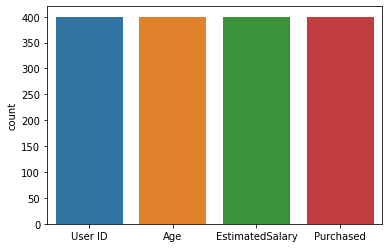

In [ ]:
sb.countplot(data=data)

Countplot graph to check number of purchased(1) and not purchased(0)

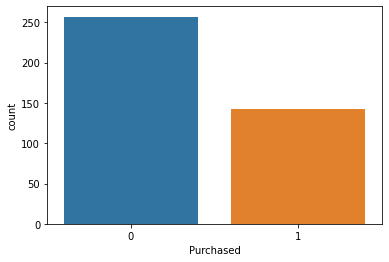

In [ ]:
sb.countplot(x='Purchased',data=data)

Purchase count based on Gender

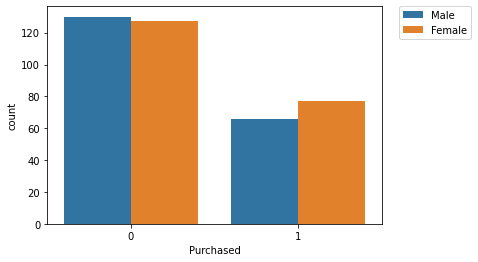

In [ ]:
sb.countplot(x='Purchased',hue='Gender',data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Purchase count based on age

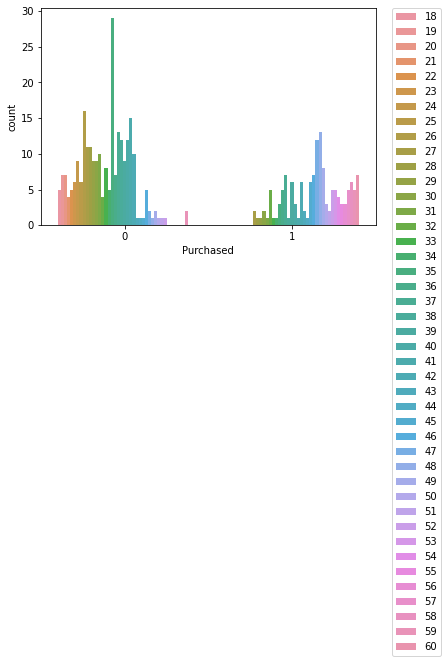

In [ ]:
sb.countplot(x='Purchased',hue='Age',data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Purchase count based on Estimated Salary


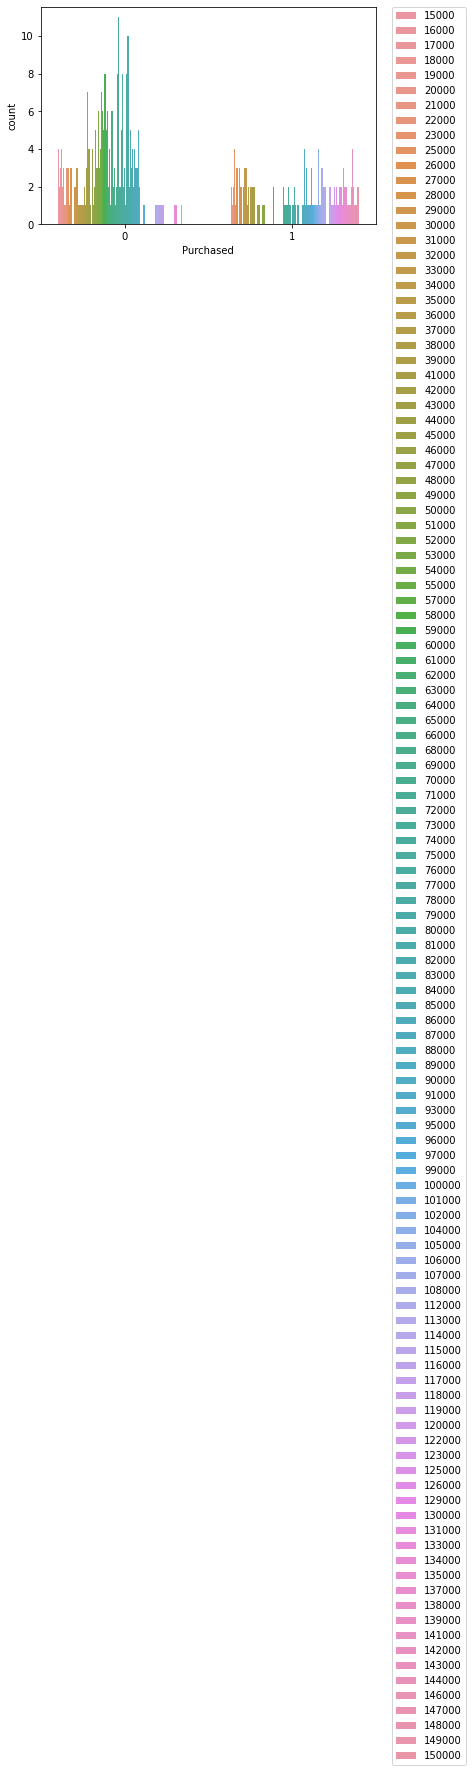

In [ ]:
sb.countplot(x='Purchased',hue='EstimatedSalary',data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Histogram Analysis of Age Attribute

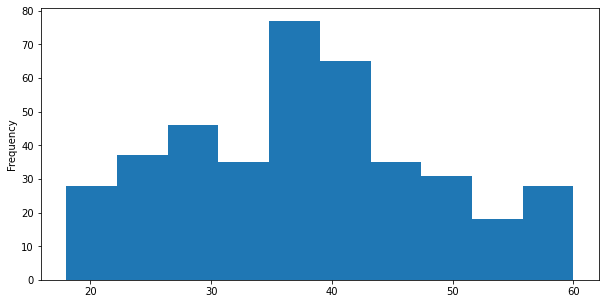

In [ ]:
data['Age'].plot.hist()

Histogram analysis of EstimatedSalary Attribute

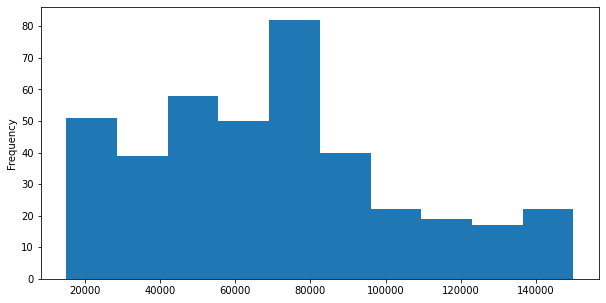

In [ ]:
data['EstimatedSalary'].plot.hist()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


Box Plot for Estimated Salary vs Age

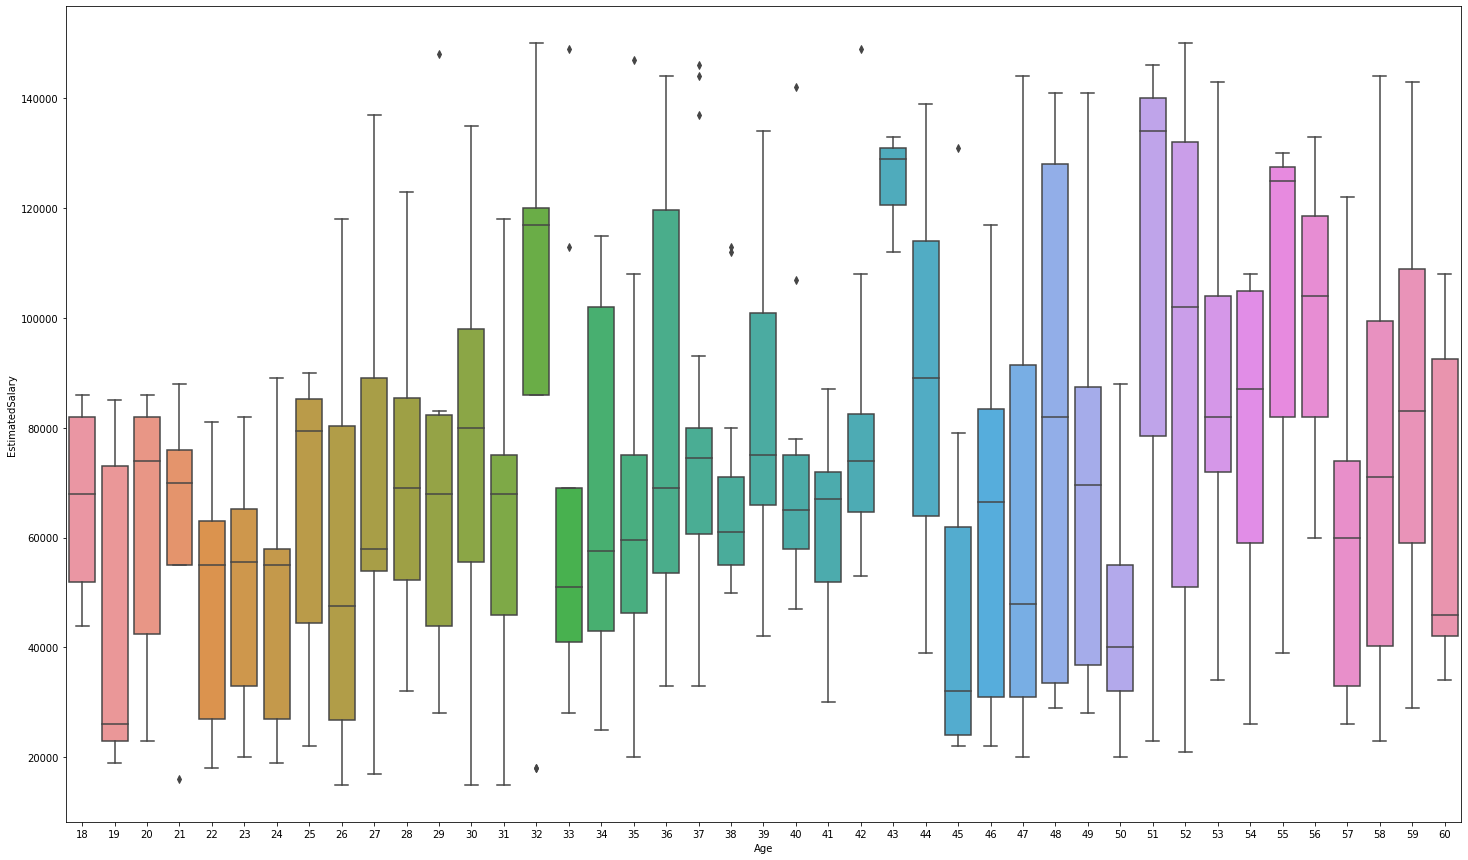

In [ ]:
sb.boxplot(x='Age',y='EstimatedSalary',data=data)
plt.rcParams['figure.figsize'] = (25.0, 15.0)

#Data Wrangling

**Checking for missing values**

In [ ]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Since there is no null values in any attribute we will proceed to change attributes with string to Categorical Value

**Changing Gender to Categorical Value**

In [ ]:
data_new = pd.get_dummies(data,columns=['Gender'])
data_new.head(5)

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


**Dropping Gender_Male Column**

In [ ]:
data_new = data_new.drop(columns=['Gender_Female'])
data_new.head(5)

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


**Dropping Irrelevant column from the given data**

In [ ]:
data_new = data_new.drop(columns=['User ID'])
data_new.head(5)

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


# Train and Test

Importing and Spliting the dataset

Test Set is Split up as 20 % percent of orginal set and Training Set as 80% of Original Dataset


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

x = data_new.drop('Purchased',axis=1)
y = data_new['Purchased']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


**Data Preprocessing using sklearn preprocessing library**

The Standard Scaler Standardize the features by removing mean and scaling to unit variance 



In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

**Model Training and Predicting**

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)
predict = model.predict(x_test)

**Accuracy , Confusion Matrix and Classification Report for the model**

In [ ]:
print('Classification Report')
print(classification_report(y_test, predict))
print('Confusion Matrix')
print(confusion_matrix(y_test, predict))
print('\n Accuracy Report')
print(accuracy_score(y_test, predict))

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        52
           1       0.88      0.75      0.81        28

    accuracy                           0.88        80
   macro avg       0.88      0.85      0.86        80
weighted avg       0.88      0.88      0.87        80

Confusion Matrix
[[49  3]
 [ 7 21]]

 Accuracy Report
0.875
